# Imports

In [44]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [45]:
n = 6 # 5~9
label_name = "stat7" # update stat number
layers = [2*n, n] # mess with the layers (last layer should be the number of possibilities for this stat)

epochs = 10000 # increase if the loss is still decreasing by the end of training
train_split, test_split = 0.8, 0.2
learning_rate = 0.001 # don't change probably
momentum = 0.9 # don't change probably
batch_size = 64 # higher acc and longer runtime if smaller

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [46]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [47]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 16.362143397331238
Epoch 1, Loss 16.354401350021362
Epoch 2, Loss 16.320120096206665
Epoch 3, Loss 16.25468158721924
Epoch 4, Loss 16.20119273662567
Epoch 5, Loss 16.163801670074463
Epoch 6, Loss 16.140448570251465
Epoch 7, Loss 16.07582998275757
Epoch 8, Loss 16.03441083431244
Epoch 9, Loss 16.019756317138672
Epoch 10, Loss 15.969497203826904
Epoch 11, Loss 15.930337309837341
Epoch 12, Loss 15.92527949810028
Epoch 13, Loss 15.889257311820984
Epoch 14, Loss 15.760844230651855
Epoch 15, Loss 15.852089881896973
Epoch 16, Loss 15.776718139648438
Epoch 17, Loss 15.732385754585266
Epoch 18, Loss 15.722572207450867
Epoch 19, Loss 15.607717752456665
Epoch 20, Loss 15.687111735343933
Epoch 21, Loss 15.513181328773499
Epoch 22, Loss 15.601813077926636
Epoch 23, Loss 15.429233193397522
Epoch 24, Loss 15.575979351997375
Epoch 25, Loss 15.559041023254395
Epoch 26, Loss 15.51748275756836
Epoch 27, Loss 15.491602420806885
Epoch 28, Loss 15.407899975776672
Epoch 29, Loss 15.416106104850

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

C:\Users\lewil\AppData\Local\Temp\ipykernel_15820\2152728193.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


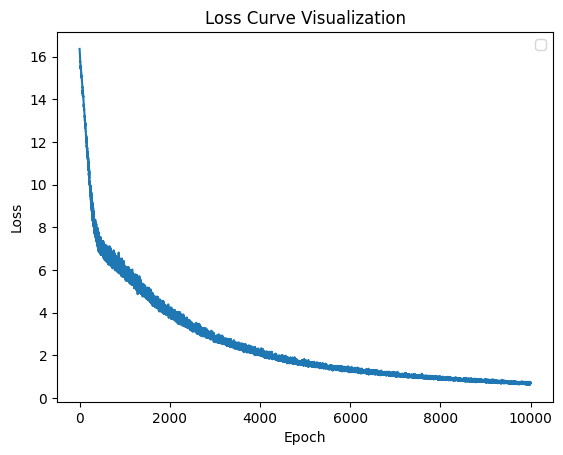

In [48]:
# plot loss vs epoch
plt.plot([i for i in range(epochs)], losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss Curve Visualization')
plt.legend()
plt.savefig(f'figures/loss_curve_{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[1, 0, 0, 0, 0, 0], [0, 49, 0, 0, 0, 0], [0, 0, 233, 9, 0, 0], [0, 0, 7, 234, 0, 0], [0, 0, 0, 0, 42, 0], [0, 0, 0, 0, 0, 1]]


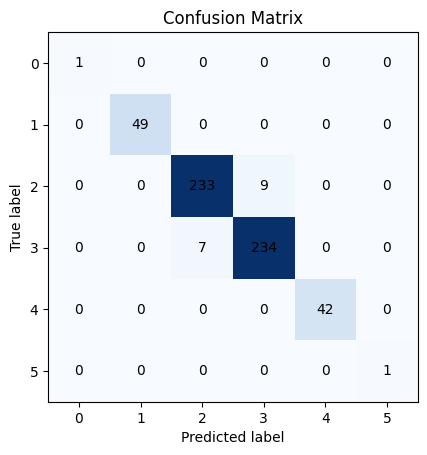

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Accuracy for class 2 = 96.28099173553719%
Accuracy for class 3 = 97.0954356846473%
Accuracy for class 4 = 100.0%
Accuracy for class 5 = 100.0%
Overall accuracy = 97.22222222222223%


In [52]:
confusion_matrix = evaluate_model(model, training_dataset) # try training_dataset and test_dataset

print(confusion_matrix)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

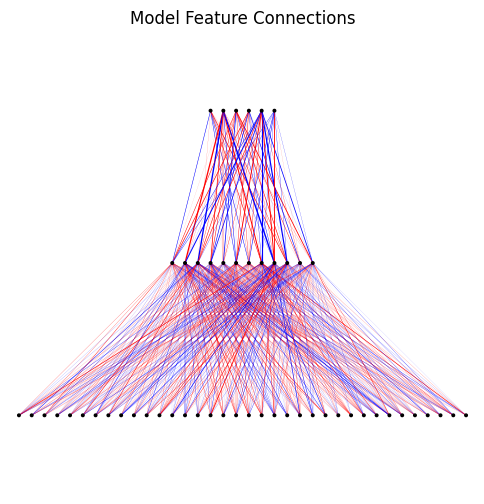

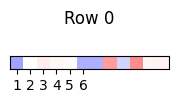

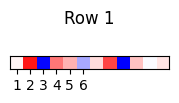

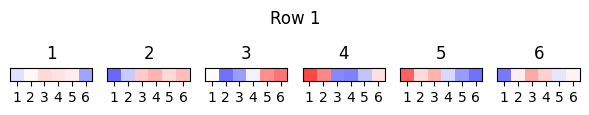

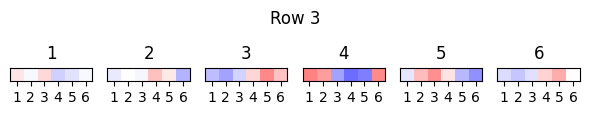

In [50]:
model.plot_connections()

model.plot_heatmap_feature(1, 0)
model.plot_heatmap_feature(1, 1)

model.plot_heatmap_feature(0, 1)
model.plot_heatmap_feature(0, 3)